In [52]:
%matplotlib inline

import os
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import netCDF4
import gsw
from glob import glob
from collections import OrderedDict
import datetime as dt

pd.set_option("display.max_rows",30)
pd.set_option("precision",18)
pd.set_option('expand_frame_repr', False)

In [14]:
basedir = '.'
datadir = 'data'
infile = 'ITGC_TO_2019_ALL_fortiming'
suffix = '.csv'
itgc_file = os.path.join(basedir,datadir,infile+suffix)


In [15]:
df = pd.read_csv(itgc_file)
df['datestring'] = pd.to_datetime(df['unixtime'],unit='s')
df = df.set_index(pd.to_datetime(df['unixtime'],unit='s'))

In [16]:
df.head()

,LINE,RAW_GRAV_REL,unixtime,ZACC_COR,datestring
unixtime,,,,,
2019-02-07 12:34:54.500,14,-124.163157,1.549543e+09,103.988770,2019-02-07 12:34:54.500
2019-02-07 12:34:55.500,14,-159.799557,1.549543e+09,0.106624,2019-02-07 12:34:55.500
2019-02-07 12:34:56.500,14,-113.769207,1.549543e+09,1.150509,2019-02-07 12:34:56.500
2019-02-07 12:34:57.500,14,-156.829857,1.549543e+09,-4.843779,2019-02-07 12:34:57.500
2019-02-07 12:34:58.500,14,-196.920807,1.549543e+09,2.080389,2019-02-07 12:34:58.500


In [17]:
gb = df.groupby(['LINE'])

# gb.describe()

# gb['FAG070'].describe()

# Group the dataframe by regiment, and for each regiment,
for name, group in gb:
    print(name)
#     print(group['FAG070'].describe())

5
6
7
8
9
11
12
14


In [18]:
segment = 9
# plt.plot(df['LINE'].where((df['LINE'] == segment)))
# oib_lineplot_cust(df.where((df['LINE'] == segment)))

# gb[["TIME", "FAG070"]].get_group(segment)
lf = gb.get_group(segment)

In [20]:
lf.columns

Index(['LINE', 'RAW_GRAV_REL', 'unixtime', 'ZACC_COR', 'datestring'], dtype='object')

In [21]:
def mapplot_zoom(lon, lat, field, units='', ptitle='test_map', pfile='test_map'):
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
    import cartopy.feature
    import shapely.geometry as sgeom
    try:
        # box = sgeom.box(minx=0, maxx=360, miny=-88, maxy=-56)
        # x0, y0, x1, y1 = box.bounds
        myproj = ccrs.SouthPolarStereo(central_longitude=180)

        plt.figure(figsize=(8, 4), facecolor='white', dpi=144)
        ax = plt.axes(projection=myproj)

        #         plt.scatter(data['LONG'], data['LAT'], c='black', s=1, transform=ccrs.PlateCarree())
        plt.scatter(lon, lat, c=field, cmap=cm.jet, s=15, transform=ccrs.PlateCarree())
        c = plt.colorbar(orientation='vertical', shrink=0.4, pad=0.10)
        c.ax.set_yticklabels(c.ax.get_yticklabels(), rotation=0)
        c.set_label(units)
        # transform = ccrs.PlateCarree()._as_mpl_transform(ax)
        # for i, txt in enumerate(field):
        #     # print '%s: %s, %s' % (txt, lon[i], lat[i])
        #     ax.annotate(txt, (lon[i], lat[i]), xycoords=transform,
        #                 ha='right', va='top')

        ax.coastlines(resolution='50m')
        # ax.add_feature(cartopy.feature.LAND)
        # ax.add_feature(cartopy.feature.OCEAN)
        # ax.gridlines(draw_labels=False, alpha=0.3, color='grey')
        # ax.xformatter = LONGITUDE_FORMATTER
        # ax.yformatter = LATITUDE_FORMATTER
        # ax.set_extent([x0, x1, y0, y1], ccrs.PlateCarree())

        plt.tight_layout()
        plt.subplots_adjust(top=1.25)
        plt.suptitle(ptitle, y=0.98)
        plt.savefig(pfile, bbox_inches='tight')  # save the figure to file
        # plt.show()
        # plt.close()
    except IndexError:
        print("Couldn't make Map Plot.")
    return


# mapplot_zoom(lf[''])

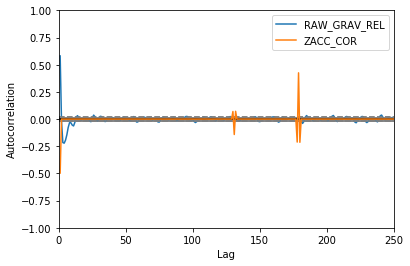

In [8]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(lf['RAW_GRAV_REL'], label='RAW_GRAV_REL')
# autocorrelation_plot(df['grav_4_70_corr'])
autocorrelation_plot(lf['ZACC_COR'], label='ZACC_COR')
plt.legend()
plt.xlim([0, 250])
plt.show()

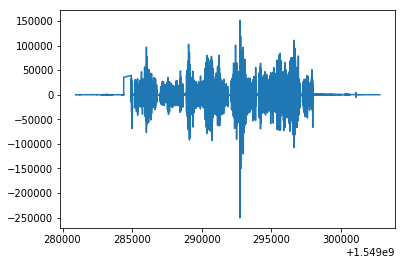

In [9]:
a = lf['RAW_GRAV_REL'].values[:]
b = lf['ZACC_COR'].values[:]
x = lf['unixtime'].values[:]
#
# a = lf['RAW_GRAV_REL'].values[9000:9300]
# b = lf['ZACC_COR'].values[9000:9300]
# x = lf['unixtime'].values[9000:9300]
plt.plot(x, a)

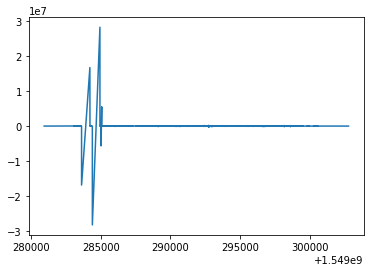

In [10]:
plt.plot(x, b)

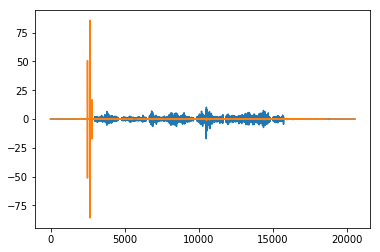

In [11]:
# regularize datasets by subtracting mean and dividing by s.d.
a -= a.mean(); a /= a.std()
b -= b.mean(); b /= b.std()
plt.plot(a); plt.plot(b);

In [12]:
# #fourier transform both series
# FT1 = np.fft.fft(a)
# FT2 = np.fft.fft(b)

# print(np.log(FT2[1:]/FT1[1:])/(-1.j*np.arange(1,len(a))))

In [22]:
from scipy import signal, fftpack

A = fftpack.fft(a)
B = fftpack.fft(b)
Ar = -A.conjugate()
Br = -B.conjugate()
print(np.argmax(np.abs(fftpack.ifft(Ar*B))))
print(np.argmax(np.abs(fftpack.ifft(A*Br))))

12722
7843


In [23]:
import scipy

af = scipy.fft(a)
bf = scipy.fft(b)
c = scipy.ifft(af * scipy.conj(bf))

time_shift = np.argmax(abs(c))
print(time_shift)

7843


/Users/dporter/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


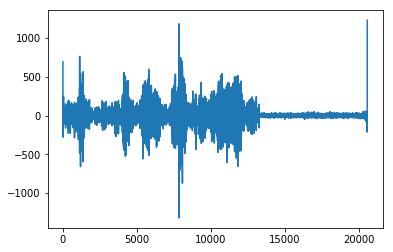

In [24]:
plt.plot(c)

In [25]:
from scipy import signal, fftpack

def get_max_correlation(original, match):
    z = signal.fftconvolve(original, match[::-1])
    lags = np.arange(z.size) - (match.size - 1)
    return ( lags[np.argmax(np.abs(z))] )

get_max_correlation(a, b)

7843

In [31]:
from scipy.signal import correlate

nsamples = a.size

# Find cross-correlation
xcorr = correlate(a, b)

# delta time array to match xcorr
dt = np.arange(1-nsamples, nsamples)

recovered_time_shift = dt[xcorr.argmax()]

print("Recovered time shift: %d" % (recovered_time_shift))

Recovered time shift: -1


In [27]:
scipy.signal.signaltools.correlate(a, b).argmax()

20563

In [29]:
from scipy.interpolate import interp1d
from scipy.optimize import leastsq

def err_func(p):
    return interp1d(x,a)(x[1:-1]+p[0]) - b[1:-1]

p0 = [0,] # Inital guess of no shift
found_shift = leastsq(err_func,p0)[0][0]

print("Found   shift: ", found_shift)

Found   shift:  0.0


## Read in 200Hz iMAR data

In [126]:
df_pos=pd.read_csv('/Volumes/C/data/Antarctic/ITGC/Thw_GPS_18_19/09.txt', delimiter=r"\s+", engine='python',
                   header=0, skiprows=[0,1,2,4])
# df_gps=pd.read_csv('/Volumes/C/data/Antarctic/ITGC/Thw_GPS_18_19/09.txt', delimiter=r"\s+",
#                    skiprows=5)  #skiprows=range(0, 50), nrows=10))

df_pos['unixtime'] = pd.to_datetime(df_pos['Date'] + ' ' + df_pos['Time'])
df_pos = df_pos.set_index('unixtime')
df_pos.head()

,Date,Time,Lat_deg,Lon_deg,Hght_GRS80,rel_N,rel_E,rel_H,Roll,Pitch,Heading,FAA,Grav_Ap,Grav_absolute,Grav_normal
unixtime,,,,,,,,,,,,,,,
2019-02-04 11:45:59.001565,2019/02/04,11:45:59.001565,-76.458149396999999681,-107.781546722999991061,1002.569600000000036744,1.040999999999999925,0.672000000000000042,1.656999999999999806,-0.882729000000000097,0.750570999999999988,96.492800000000002569,13.333199999999999719,-0.0,982637.207900000037625432,982623.874599999981001019
2019-02-04 11:45:59.101562,2019/02/04,11:45:59.101562,-76.458149396999999681,-107.781546722999991061,1002.569499999999948159,0.198999999999999982,0.145999999999999991,0.925000000000000044,-0.882713999999999888,0.751291999999999960,96.492999999999994998,13.333199999999999719,-0.0,982637.219000000040978193,982623.885800000047311187
2019-02-04 11:45:59.201560,2019/02/04,11:45:59.201560,-76.458149396999999681,-107.781546722999991061,1002.569399999999973261,0.198999999999999982,0.145999999999999991,0.925000000000000044,-0.882079999999999975,0.751085000000000003,96.492900000000005889,13.333199999999999719,-0.0,982637.219000000040978193,982623.885800000047311187
2019-02-04 11:45:59.301558,2019/02/04,11:45:59.301558,-76.458149398000003316,-107.781546722999991061,1002.569299999999998363,0.198999999999999982,0.145999999999999991,0.925000000000000044,-0.879900000000000015,0.749951000000000034,96.492800000000002569,13.333199999999999719,-0.0,982637.219000000040978193,982623.885800000047311187
2019-02-04 11:45:59.401556,2019/02/04,11:45:59.401556,-76.458149398000003316,-107.781546723999994697,1002.569200000000023465,0.198999999999999982,0.145999999999999991,0.925000000000000044,-0.877715999999999941,0.751295999999999964,96.492999999999994998,13.333199999999999719,-0.0,982637.219000000040978193,982623.885800000047311187


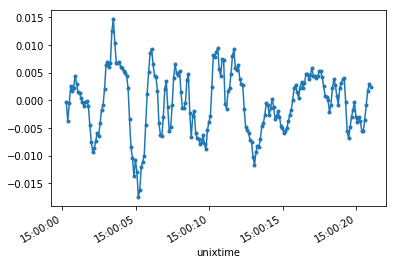

In [130]:
df_pos.loc['2019-02-04 15:00:00':'2019-02-04 15:00:20']['Hght_GRS80'].diff().diff().plot(style='.-')

In [233]:
# df_gps=pd.read_csv('/Volumes/SeagateBLUE/ITGC_TO_2019/QC/iMAR/TG09_20190204_iMAR_QC_STD.txt', delimiter=r"\s+", engine='python',
#                    header=0, skiprows=range(0, 19), nrows=10000)
# df_gps = df_gps.iloc[1:]

###
headers = ('UTCDate','UTCTime','UTCTime','UTCTime','Latitude','Longitude','H-Ell',
           'Pitch','Roll','Heading','NS','PDOP','AccBiasZ')
# dtypes = {'UTCTime': 'string','Latitude': 'float','Longitude': 'float','H-Ell': 'float',
#            'Pitch': 'float','Roll': 'float','Heading': 'float',
#            'NS': 'int64','PDOP': 'float','AccBiasZ': 'float'}
incols = np.arange(3,np.alen(headers),1)

df_gps = pd.read_csv('/Volumes/SeagateBLUE/ITGC_TO_2019/QC/iMAR/TG09_20190204_iMAR_QC_STD.txt',
                delimiter=r"\s+", 
                skiprows=21, 
                header=None, 
                names=headers,
                usecols=incols)#,
#                 nrows=750000)

/Users/dporter/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [234]:
df_gps['unixtime'] = pd.to_datetime(df_gps['UTCTime'] * 10 ** 9, unit='ns')
df_gps = df_gps.set_index('unixtime')

df_gps.head()

,UTCTime,Latitude,Longitude,H-Ell,Pitch,Roll,Heading,NS,PDOP,AccBiasZ
unixtime,,,,,,,,,,
2019-02-04 11:45:41.000000000,1.549280741000000000e+09,-76.458148717800000327,-107.781545296000004441,1001.341000000000008185,0.748454767799999976,-0.873348107999999956,96.523059937000013520,5,0.0,-0.0010452047
2019-02-04 11:45:41.005000192,1.549280741005000114e+09,-76.458148717800000327,-107.781545296000004441,1001.341000000000008185,0.748914244399999984,-0.873172421899999995,96.523317062199993188,5,0.0,-0.0010452405
2019-02-04 11:45:41.009999872,1.549280741009999990e+09,-76.458148717900002111,-107.781545296000004441,1001.341999999999984539,0.748733589800000043,-0.873042716200000068,96.522969987800010472,5,0.0,-0.0010452764
2019-02-04 11:45:41.015000064,1.549280741015000105e+09,-76.458148718000003896,-107.781545297000008077,1001.341999999999984539,0.748468447600000086,-0.873345066700000006,96.522810575499988772,5,0.0,-0.0010453121
2019-02-04 11:45:41.020000000,1.549280741019999981e+09,-76.458148718100005681,-107.781545297000008077,1001.341999999999984539,0.749094402399999915,-0.873351936399999973,96.523215828700003271,5,0.0,-0.0010453480


In [ ]:
df_gps.loc['2019-02-04 15:00:00':'2019-02-04 15:00:20']['H-Ell'].diff().plot(style=',')

# df_gps.loc['2019-02-04 15:00':'2019-02-04 15:01']['H-Ell'].plot()

Index(['LINE', 'RAW_GRAV_REL', 'unixtime', 'ZACC_COR', 'datestring'], dtype='object')


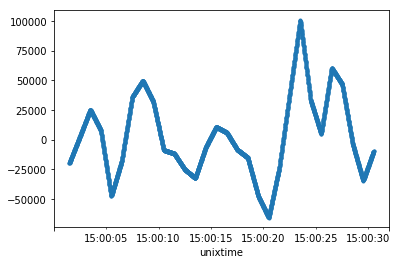

In [171]:
print(lf.columns)
lf.loc['2019-02-04 15:00:00':'2019-02-04 15:00:30']['RAW_GRAV_REL'].resample('10L').interpolate().plot(style='.-')
# df_pos.loc['2019-02-04 15:00:00':'2019-02-04 15:00:20']['Hght_GRS80'].diff().diff().plot(style='.-')

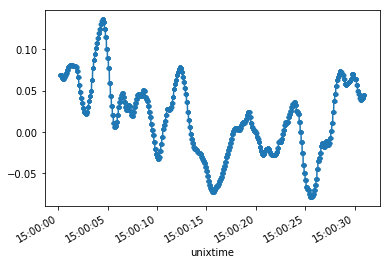

In [173]:
df_pos.loc['2019-02-04 15:00:00':'2019-02-04 15:00:30']['Hght_GRS80'].diff().resample('10L').ffill().plot(style='.-')

In [ ]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

lf.loc['2019-02-04 15:00:00':'2019-02-04 15:00:50']['RAW_GRAV_REL'].shift(0).plot(ax=ax, style='.b-')
# same ax as above since it's automatically added on the right
# df_pos.loc['2019-02-04 15:00:00':'2019-02-04 15:00:50']['Hght_GRS80'].diff().plot(ax=ax, style='.r-', secondary_y=True)
df_gps.loc['2019-02-04 15:00:00':'2019-02-04 15:00:50']['H-Ell'].resample('10L').interpolate().diff().plot(ax=ax2, style=',')

# df.C.plot(ax=ax3, style='g-')

In [226]:
a = df_pos.loc['2019-02-04 15:00:00':'2019-02-04 15:05:30']['Hght_GRS80'].diff().diff().resample('100L').bfill()
b = lf.loc['2019-02-04 15:00:00':'2019-02-04 15:05:30']['RAW_GRAV_REL'].resample('100L').interpolate()

a -= a.mean(); a /= a.std()
b -= b.mean(); b /= b.std()

In [227]:
from scipy.signal import correlate

nsamples = a.size

# Find cross-correlation
xcorr = correlate(a, b)

# delta time array to match xcorr
dt = np.arange(1-nsamples, nsamples)

recovered_time_shift = dt[xcorr.argmax()]

print("Recovered time shift: %d" % (recovered_time_shift))

Recovered time shift: -3309


In [228]:
from scipy import signal, fftpack

A = fftpack.fft(a)
B = fftpack.fft(b)
Ar = -A.conjugate()
Br = -B.conjugate()
print(np.argmax(np.abs(fftpack.ifft(Ar*B))))
print(np.argmax(np.abs(fftpack.ifft(A*Br))))

ValueError: operands could not be broadcast together with shapes (3310,) (3291,) 

In [229]:
get_max_correlation(a, b)

-3290

In [230]:
from scipy.signal import correlate

nsamples = a.size

# Find cross-correlation
xcorr = correlate(a, b)

# delta time array to match xcorr
dt = np.arange(1-nsamples, nsamples)

recovered_time_shift = dt[xcorr.argmax()]

print("Recovered time shift: %d" % (recovered_time_shift))

Recovered time shift: -3309


In [231]:
nsamples

3310